# ECE 447 Project

## Authors
Kyle Bricker - 1578023  
Max Eberle - 1576215  
Dhruv Pranlal - 1628666

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import warnings
warnings.simplefilter("ignore")

# Data Exploration

In [2]:
df=pd.read_csv("zoo.csv")
target_names = list(set(df["type"])) # gets array of zoo animal types
# target_names = [item.strip('\'').replace('b\'','') for item in target_names]
# print(target_names)


# df.type.replace({'b\'reptile\'':'reptile','b\'bird\'':'bird','b\'amphibian\'':'amphibian','b\'insect\'':'insect','b\'fish\'':'fish','b\'mammal\'':'mammal','b\'invertebrate\'':'invertabrate'}, inplace=True)
df.type.replace({'b\'reptile\'':0,'b\'bird\'':1,'b\'amphibian\'':2,'b\'insect\'':3,'b\'fish\'':4,'b\'mammal\'':5,'b\'invertebrate\'':6}, inplace=True)
df.hair.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.feathers.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.eggs.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.milk.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.airborne.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.aquatic.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.predator.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.toothed.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.backbone.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.breathes.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.venomous.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.fins.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df['tail'].replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.domestic.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)
df.catsize.replace({'b\'true\'':1, 'b\'false\'':0}, inplace=True)

X=df.drop(columns=['type', 'animal'])
y=df['type']
target_names = ['Reptile','Bird','Amphibian','Insect','Fish','Mammal','Invertebrate']
target_labels = [0,1,2,3,4,5,6]
print(target_names)
feature_names = list(X.columns)
print(feature_names)

['Reptile', 'Bird', 'Amphibian', 'Insect', 'Fish', 'Mammal', 'Invertebrate']
['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


### Describing Features

In [3]:
X.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


### Showing Complete Dataset

In [4]:
df.isna().sum()

animal      0
hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

### Total Number of Each Class

Mammal          41
Bird            20
Fish            13
Invertebrate    10
Insect           8
Reptile          5
Amphibian        4
Name: type, dtype: int64


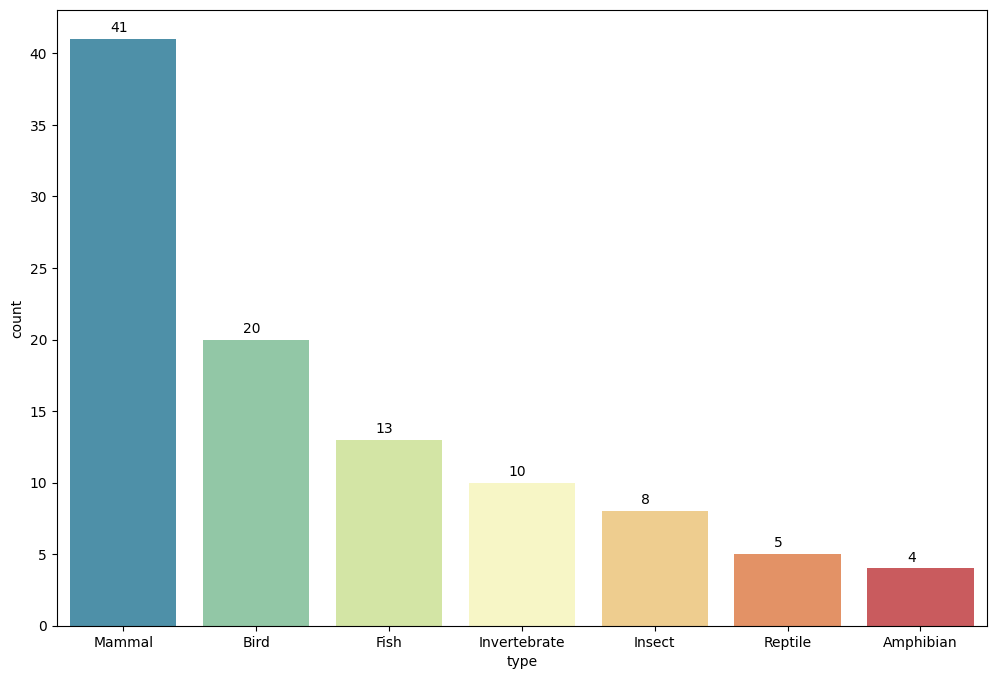

In [5]:
y_names = y.copy()
for i in range(0,7):
    y_names[y_names == i] = target_names[i]
print(y_names.value_counts())

plt.figure(figsize = (12,8))
ax = sns.countplot(
        x='type', 
        data=df,
        order=df['type'].value_counts().index,
        palette='Spectral_r'
        )
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))
x_labels = []
for text in ax.get_xticklabels():
        x_labels.append(target_names[int(text.get_text())])
ax.set_xticklabels(x_labels)
plt.show()


### Feature Correlation Matrix

<Axes: >

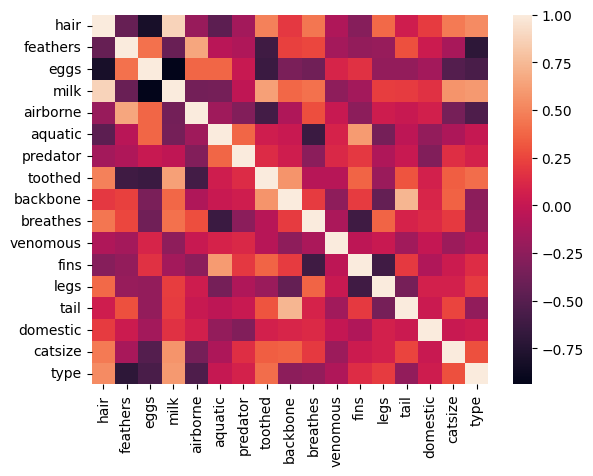

In [6]:
data_corr = df.corr(method = 'pearson')
sns.heatmap(data_corr)

# Decision Tree Model

In [7]:
# Get testing and training values for the model
X_train, X_test, Y_train, Y_test = train_test_split( X.values , y , test_size = 0.3, random_state = 3)

In [8]:
from sklearn.utils import resample
import statistics

# Bootstrapping function
def bootstrap(model,X_train,n):
    iterations = n # number of bootstrap samples
    size = int(len(X_train)*0.5) # size of bootstrap sample
    #stats = list()
    vals = []
    for i in range(iterations):
        train = resample(X_train, n_samples=size) # sampling with replacement, unused data is used for test data
        test = np.array([x for x in X_train if x.tolist() not in train.tolist()]) # data not used by training sample is used here
        model.fit(train[:,:-1], train[:,-1]) # train model - model.fit(X_train,y_train) 
        predictions = model.predict(test[:,:-1]) # make predictions - model.predict(X_test)
        score = accuracy_score(test[:,-1], predictions) # score predictions
        #print(round(score,3))
        #stats.append(score)
        vals += [score] # store score for average
    print("The bootstrap score is:", round(statistics.mean(vals),3)) # print average score

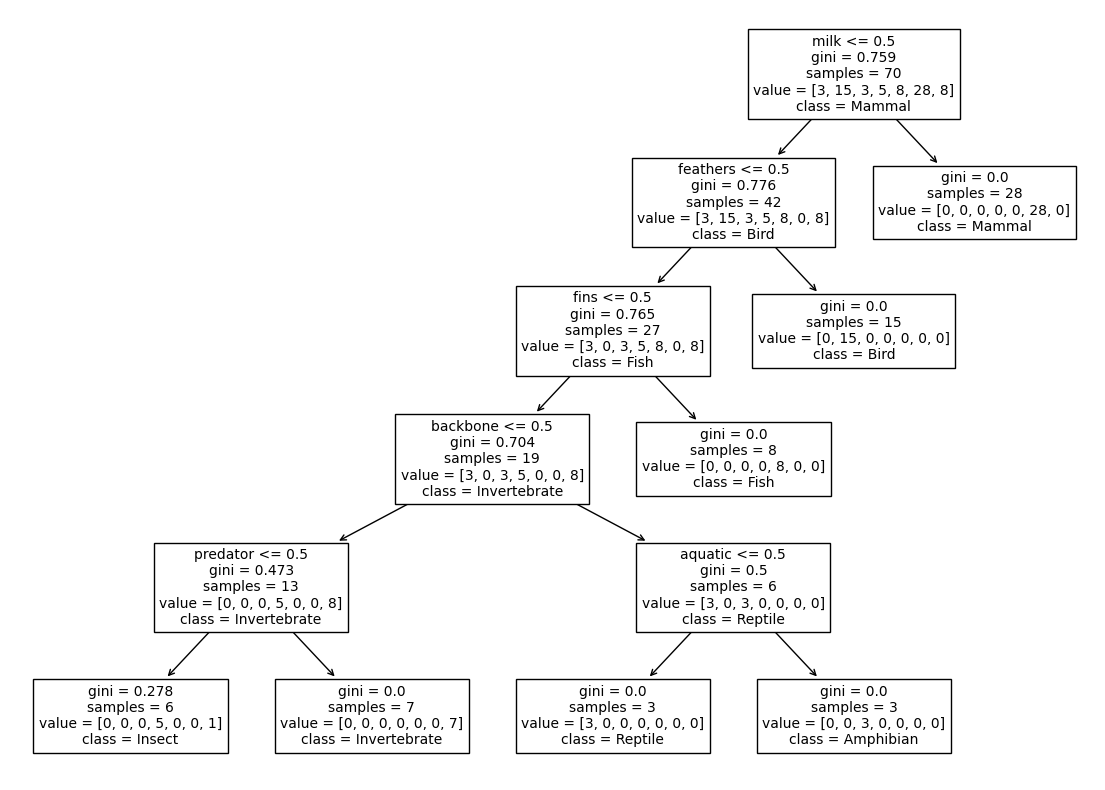

In [9]:
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

plt.figure(figsize=(14,10))
tree.plot_tree(clf, feature_names=feature_names, class_names=target_names, fontsize=10)
plt.show()
#

              precision    recall  f1-score   support

     Reptile       1.00      0.50      0.67         2
        Bird       1.00      1.00      1.00         5
   Amphibian       0.50      1.00      0.67         1
      Insect       0.67      0.67      0.67         3
        Fish       1.00      1.00      1.00         5
      Mammal       1.00      1.00      1.00        13
Invertebrate       0.50      0.50      0.50         2

    accuracy                           0.90        31
   macro avg       0.81      0.81      0.79        31
weighted avg       0.92      0.90      0.90        31

The 5-fold cross validation scores are:
   Score
0  0.952
1  0.850
2  0.900
3  0.850
4  0.950
The bootstrap score is: 0.61


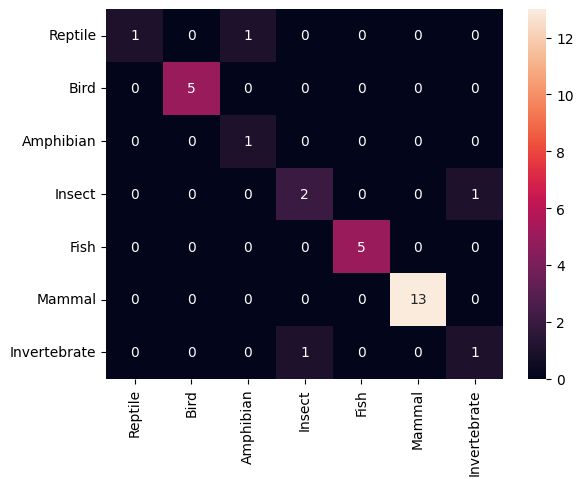

In [22]:
print(classification_report(Y_test, Y_pred, target_names=target_names, labels=target_labels))
dt_cross = cross_val_score(clf,X,y,cv=5)
print("The 5-fold cross validation scores are:")
dt_cross_df = pd.DataFrame(data={'Score': dt_cross})
print(dt_cross_df.round(3))
bootstrap(clf,X.to_numpy(),200)

cm = confusion_matrix(Y_test, Y_pred, labels=target_labels, )
sns.heatmap(cm, yticklabels=target_names, xticklabels=target_names, annot=True);

### Decision Tree Performance

As shown above, the decision tree model obtained an overall accuracy of 90%. It determined that the milk feature was the most important, followed by the feathers and fins features. However, given a 70/30 train/test split, it seemed to struggle with predicting the invertebrate and amphibian targets, and only correctly predicted them 50% of the time. Further, it only managed to predict half of the reptiles and invertebrates. Since there were only three false predictions total, this was likely due to a bad split from there only being 101 values in the dataset. Changing the split to 60/40 train/test improved on this by resulting in a higher overall accuracy of 93%, but the same three missclassifications were made. To check for overfitting, 5-fold cross validation was used, which resulted in scores of 0.952, 0.850, 0.900, 0.850, and 0.950, supporting the overall accuracy. However, due to the small size of the dataset, bootstrapping was attempted, which returned a score of 0.61. Since bootstrapping uses resampling, this value may be biased. 

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model_lr = LogisticRegression(max_iter = 101)
model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=101)

              precision    recall  f1-score   support

     Reptile       1.00      0.50      0.67         2
        Bird       1.00      1.00      1.00         5
   Amphibian       1.00      1.00      1.00         1
      Insect       1.00      1.00      1.00         3
        Fish       0.83      1.00      0.91         5
      Mammal       1.00      1.00      1.00        13
Invertebrate       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.98      0.93      0.94        31
weighted avg       0.97      0.97      0.96        31

The 5-fold cross validation scores are:
   Score
0   1.00
1   0.95
2   0.90
3   0.95
4   0.95
The bootstrap score is: 0.643


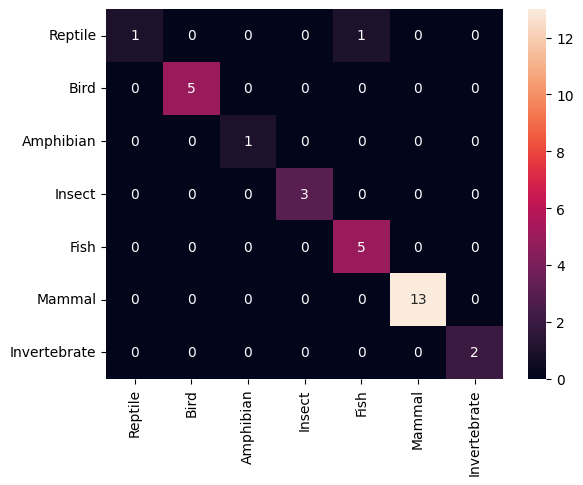

In [25]:
Y_pred_lr = model_lr.predict(X_test)
cr_lr = classification_report(Y_test, Y_pred_lr, target_names=target_names)
print(cr_lr)
logreg_cross = cross_val_score(model_lr,X,y,cv=5)
print("The 5-fold cross validation scores are:")
logreg_cross_df = pd.DataFrame(data={'Score': logreg_cross})
print(logreg_cross_df.round(3))
bootstrap(model_lr,X.to_numpy(),100)

cm = confusion_matrix(Y_test, Y_pred_lr, labels=target_labels,)
sns.heatmap(cm, yticklabels=target_names, xticklabels=target_names, annot=True);

### Logistic Regression Performance

As shown above, the logistic regression model obtained an overall accuracy of 97% with only one false prediction, mislabeling a reptile as a fish. However, since the reptile target only had two values, it received a recall of 50%. To mitigate this, the train/test split was changed from 70/30 to 60/40, but the logistic regression model continued making the same incorrect prediction.  The change in the train/test split also gave the model more values to test, of which it correctly predicted all of them, increasing the overall accuracy to 98%. 5-fold cross validation was used on the model, and returned values of 1.00, 0.95, 0.90, 0.95, and 0.95, which support the overall accuracy. Since the dataset used only contains 101 values per feature, bootstrapping was attempted to obtain another performance measure. This returned 0.643, which could indicate that the other accuracy measures are skewed, but more likely means that the bootstrapping function was biased.  

# Model Comparison

Comparing the decision tree and the logistic regression models, it appears that the logistic regression obtained better results. With a 97% overall accuracy compared to the decision tree's accuracy of 90%, the linear regression model was able to correctly predict all the targets in the test set except for one. While the decision tree missclassified a reptile as an amphibian, an invertebrate as an insect, and an insect as an invertebrate, the logistic regression interestingly only mixed up a reptile for a fish. Considering the 5-fold cross validation scores, the logistic regression model exceeded those of the decision tree, and its bootstrap score was higher as well. 

# K-Means Clustering

In [14]:
df_cleaned = df.drop(["animal", "type"], axis=1)

In [15]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=7,
    n_init=12,
    max_iter=5000,
    random_state=35
)
kmeans.fit(df_cleaned);

In [16]:
labels = kmeans.fit_predict(df_cleaned)
labels

array([3, 3, 5, 3, 3, 3, 3, 5, 5, 3, 3, 4, 5, 1, 6, 0, 4, 3, 5, 5, 4, 4,
       3, 4, 0, 6, 6, 2, 3, 2, 0, 3, 2, 4, 5, 3, 3, 4, 5, 0, 0, 4, 0, 4,
       3, 3, 0, 3, 3, 3, 3, 0, 6, 0, 3, 3, 4, 4, 4, 4, 5, 5, 1, 3, 3, 3,
       5, 3, 3, 3, 3, 4, 0, 5, 5, 2, 5, 1, 4, 4, 1, 1, 5, 4, 2, 6, 5, 4,
       0, 6, 6, 6, 5, 2, 3, 4, 2, 0, 3, 1, 4])

In [17]:
clusters = [[], [], [], [], [], [], []] # array of 7 arrays for our 7 clusters
names = df["animal"]

for idx in range(len(labels)):
    clusters[labels[idx]].append((names[idx], target_names[y[idx]]))

for ct in range(7):
    print(f'\nCluster {ct}:')
    print(clusters[ct])
    types = [x[1] for x in clusters[ct]]
    for name in target_names:
        if types.count(name) > 0:
            print(f"{name}: {types.count(name)}")


Cluster 0:
[("b'crayfish'", 'Invertebrate'), ("b'flea'", 'Insect'), ("b'gnat'", 'Insect'), ("b'honeybee'", 'Insect'), ("b'housefly'", 'Insect'), ("b'ladybird'", 'Insect'), ("b'lobster'", 'Invertebrate'), ("b'moth'", 'Insect'), ("b'octopus'", 'Invertebrate'), ("b'scorpion'", 'Invertebrate'), ("b'termite'", 'Insect'), ("b'wasp'", 'Insect')]
Insect: 8
Invertebrate: 4

Cluster 1:
[("b'clam'", 'Invertebrate'), ("b'pitviper'", 'Reptile'), ("b'seawasp'", 'Invertebrate'), ("b'slowworm'", 'Reptile'), ("b'slug'", 'Invertebrate'), ("b'worm'", 'Invertebrate')]
Reptile: 2
Invertebrate: 4

Cluster 2:
[("b'fruitbat'", 'Mammal'), ("b'girl'", 'Mammal'), ("b'gorilla'", 'Mammal'), ("b'sealion'", 'Mammal'), ("b'squirrel'", 'Mammal'), ("b'vampire'", 'Mammal'), ("b'wallaby'", 'Mammal')]
Mammal: 7

Cluster 3:
[("b'aardvark'", 'Mammal'), ("b'antelope'", 'Mammal'), ("b'bear'", 'Mammal'), ("b'boar'", 'Mammal'), ("b'buffalo'", 'Mammal'), ("b'calf'", 'Mammal'), ("b'cavy'", 'Mammal'), ("b'cheetah'", 'Mammal'), ("

### Clustering Results

From the output above, each cluster has the number of occurrences of each class that it contains printed below it. This shows that the bird class has the most definitive data, since all the birds are contained in cluster 4. Looking at cluster 5, all the points corresponding to the fish class are contained, but there are also three mammal points and one reptile. The mammal points include the dolphin, porpoise, and seal, while the reptile point is the seasnake. Since all these animals have similar feature data to fish, it is understandable how the algorithm would have sorted them into this cluster. On the other hand, cluster 6 is the only other cluster that contains points from three different classes: reptile, amphibian, and invertebrate. The features' data for these points, however, do not correlate well with eachother, which shows that the K-means algorithm is not well equipped for this data. 

While cluster 3 only contains the mammal class, it doesn't contain all the points and shares some with cluster 2. Looking at the feature data, another shortcoming of the K-means algorithm is revealed as the points in cluster 2 have similar features to those in cluster 3. Thus, it is unclear why the algorithm split the mammal points between these two clusters. Similarly, the algorithm struggled with the invertebrate class, as it was split across clusters 0, 1 and 6. Since the invertebrate class shares features with many of the other classes, it is clear why the algorithm had trouble defining them separately. Cluster 0 is semi-successful as it contains all the points of the insect class, but it also has some invertebrates. Again, this is somewhat understandable as the invertebrate points in cluster 0 share most features with the insects, with the only main exception being the aquatic feature. 

The results of K-means clustering with this dataset show that it is not well suited for discrete values, rather it is inteded to be used on datasets with continuous values. 

# Conclusion

Given that the nature of this dataset is discrete (most features have only two unique values), the logistic regression model would offer better performance. This is further reflected in the classification reports, 5-fold cross validation scores, and bootstrap scores of both models. In their accuracy with the zoo dataset, the decision tree misclassified three animals, while the logistic regression model only missclassified one. Despite this, further testing and validation should be done on both of these models to ensure the results generated here are not inflated. Since this dataset only contains 101 values for each feature, there is a chance that overfitting occurred. 

A K-means clustering algorithm was also tested on this dataset, but had meager performance compared to the other models. Since K-means algorithms are intended for continuous data, the discrete data from this dataset resulted in many classes being split over multiple clusters. The algorithm particularly struggled with the invertebrate, mammal, and reptile classes, although seemed to handle the bird and insect classes without issue. 